In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
df = pd.read_csv('House_Data.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [60]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [61]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [62]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [63]:
df.shape

(21613, 21)

In [64]:
house_df = df.copy()

In [65]:
house_df.drop(['id','date'],axis=1,inplace=True)

In [66]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [67]:
house_df.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [68]:
house_df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

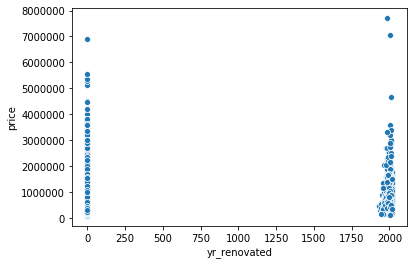

In [69]:
sns.scatterplot(x = house_df['yr_renovated'],y=house_df['price'])

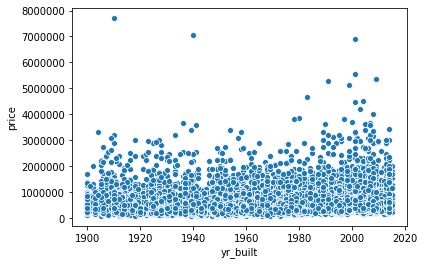

In [70]:
sns.scatterplot(x=house_df['yr_built'],y=house_df['price'])

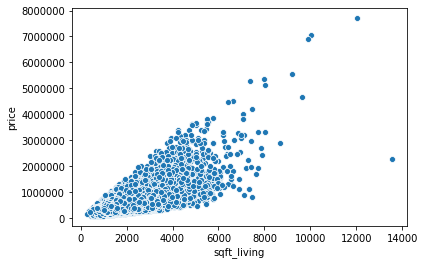

In [71]:
sns.scatterplot(x=house_df['sqft_living'],y=house_df['price'])

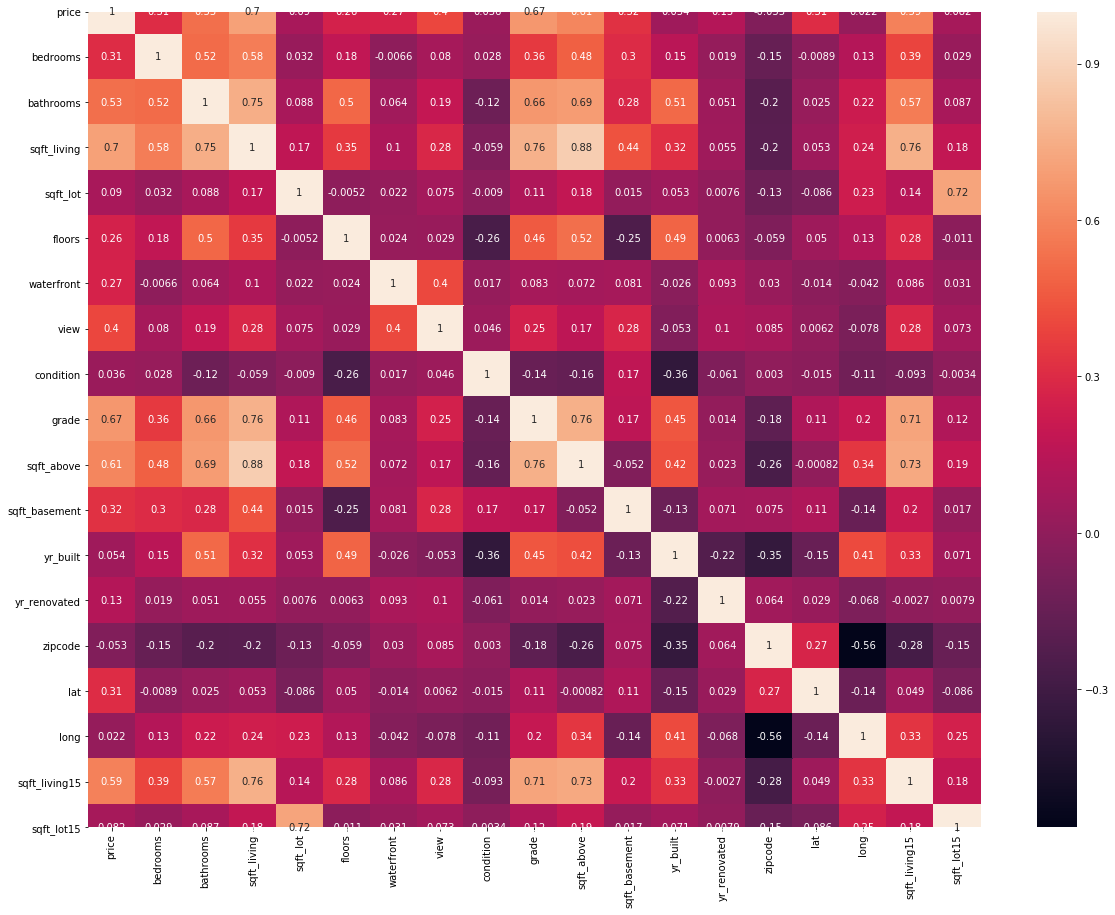

In [72]:
plt.figure(figsize=(20,15))
corr = house_df.corr()
sns.heatmap(corr, annot=True)

In [73]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [74]:
house_df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [75]:
X = house_df.iloc[:,1:]
y = house_df.iloc[:,0]

In [76]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [77]:
X.shape,y.shape

((21613, 18), (21613,))

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
model.feature_importances_

array([0.00823629, 0.03964441, 0.20446319, 0.01184033, 0.00803707,
       0.03958172, 0.04331327, 0.01005701, 0.22191854, 0.06457932,
       0.01282969, 0.03286598, 0.0063828 , 0.02045326, 0.13976141,
       0.04855311, 0.07515807, 0.01232455])

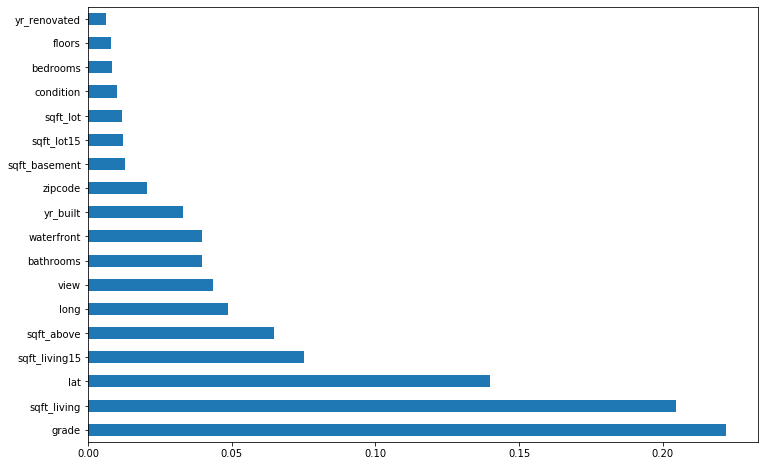

In [28]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [78]:
X.drop(['yr_renovated','sqft_basement'],axis=True,inplace=True)

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.6 MB


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [81]:
X_train.shape,y_train.shape

((15129, 16), (15129,))

In [82]:
X_test.shape,y_test.shape

((6484, 16), (6484,))

In [83]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor()
cat_model.fit(X_train,y_train)

Learning rate set to 0.0633
0:	learn: 350381.7852463	total: 17.6ms	remaining: 17.6s
1:	learn: 337468.1873634	total: 25.5ms	remaining: 12.7s
2:	learn: 324670.5760494	total: 35.8ms	remaining: 11.9s
3:	learn: 312996.8661839	total: 44ms	remaining: 11s
4:	learn: 301652.1677486	total: 51.6ms	remaining: 10.3s
5:	learn: 290719.5103884	total: 58.7ms	remaining: 9.72s
6:	learn: 281090.6033438	total: 67.4ms	remaining: 9.56s
7:	learn: 272297.7962345	total: 74ms	remaining: 9.17s
8:	learn: 264093.9808695	total: 79.9ms	remaining: 8.8s
9:	learn: 256083.0700080	total: 86ms	remaining: 8.51s
10:	learn: 247982.5722284	total: 91.8ms	remaining: 8.25s
11:	learn: 241484.2260456	total: 98ms	remaining: 8.07s
12:	learn: 235158.1081455	total: 104ms	remaining: 7.89s
13:	learn: 228354.7752799	total: 110ms	remaining: 7.74s
14:	learn: 222510.6563925	total: 116ms	remaining: 7.62s
15:	learn: 217624.7682982	total: 122ms	remaining: 7.49s
16:	learn: 212585.4789910	total: 129ms	remaining: 7.48s
17:	learn: 207838.0862551	tot

155:	learn: 109969.0931947	total: 1.18s	remaining: 6.38s
156:	learn: 109832.5846838	total: 1.19s	remaining: 6.39s
157:	learn: 109654.2506495	total: 1.2s	remaining: 6.39s
158:	learn: 109493.2186190	total: 1.21s	remaining: 6.38s
159:	learn: 109348.6931569	total: 1.21s	remaining: 6.37s
160:	learn: 109168.3960823	total: 1.22s	remaining: 6.36s
161:	learn: 109040.7931091	total: 1.23s	remaining: 6.34s
162:	learn: 108843.2633715	total: 1.23s	remaining: 6.33s
163:	learn: 108683.7275780	total: 1.24s	remaining: 6.31s
164:	learn: 108581.3705053	total: 1.24s	remaining: 6.29s
165:	learn: 108434.0568634	total: 1.25s	remaining: 6.28s
166:	learn: 108331.7262564	total: 1.26s	remaining: 6.26s
167:	learn: 108207.3450121	total: 1.26s	remaining: 6.25s
168:	learn: 108075.6209648	total: 1.27s	remaining: 6.23s
169:	learn: 107869.9557071	total: 1.27s	remaining: 6.22s
170:	learn: 107666.8932074	total: 1.28s	remaining: 6.21s
171:	learn: 107508.3975965	total: 1.29s	remaining: 6.19s
172:	learn: 107313.6797268	total

315:	learn: 93623.0328812	total: 2.56s	remaining: 5.55s
316:	learn: 93528.0912913	total: 2.57s	remaining: 5.55s
317:	learn: 93458.4545357	total: 2.59s	remaining: 5.56s
318:	learn: 93396.9227945	total: 2.62s	remaining: 5.59s
319:	learn: 93344.6931210	total: 2.63s	remaining: 5.58s
320:	learn: 93278.3509023	total: 2.64s	remaining: 5.58s
321:	learn: 93190.6023710	total: 2.65s	remaining: 5.57s
322:	learn: 93080.6606834	total: 2.65s	remaining: 5.57s
323:	learn: 93042.7917128	total: 2.69s	remaining: 5.62s
324:	learn: 92966.1305410	total: 2.7s	remaining: 5.61s
325:	learn: 92924.2379462	total: 2.71s	remaining: 5.59s
326:	learn: 92868.0010894	total: 2.71s	remaining: 5.58s
327:	learn: 92812.9355863	total: 2.73s	remaining: 5.59s
328:	learn: 92746.9319584	total: 2.74s	remaining: 5.59s
329:	learn: 92618.7641151	total: 2.76s	remaining: 5.61s
330:	learn: 92552.4045643	total: 2.77s	remaining: 5.6s
331:	learn: 92450.3383244	total: 2.78s	remaining: 5.59s
332:	learn: 92383.6115918	total: 2.79s	remaining: 

475:	learn: 84601.3945223	total: 3.91s	remaining: 4.31s
476:	learn: 84521.0721435	total: 3.92s	remaining: 4.3s
477:	learn: 84469.4449675	total: 3.93s	remaining: 4.29s
478:	learn: 84435.6016601	total: 3.94s	remaining: 4.29s
479:	learn: 84394.7375314	total: 3.95s	remaining: 4.28s
480:	learn: 84313.1469076	total: 3.96s	remaining: 4.27s
481:	learn: 84287.7856796	total: 3.96s	remaining: 4.26s
482:	learn: 84211.8191638	total: 3.97s	remaining: 4.25s
483:	learn: 84172.9733380	total: 3.97s	remaining: 4.24s
484:	learn: 84142.7223264	total: 3.98s	remaining: 4.22s
485:	learn: 84135.8275410	total: 3.98s	remaining: 4.21s
486:	learn: 84118.7554786	total: 3.99s	remaining: 4.2s
487:	learn: 84095.1871924	total: 4s	remaining: 4.19s
488:	learn: 84047.5206199	total: 4s	remaining: 4.18s
489:	learn: 83999.2257170	total: 4.01s	remaining: 4.17s
490:	learn: 83971.0204604	total: 4.01s	remaining: 4.16s
491:	learn: 83926.7513648	total: 4.02s	remaining: 4.15s
492:	learn: 83901.5864684	total: 4.03s	remaining: 4.14s


623:	learn: 79111.1326738	total: 4.93s	remaining: 2.97s
624:	learn: 79084.2991351	total: 4.94s	remaining: 2.96s
625:	learn: 79041.7856158	total: 4.95s	remaining: 2.96s
626:	learn: 79013.6199613	total: 4.96s	remaining: 2.95s
627:	learn: 78972.6130649	total: 4.97s	remaining: 2.94s
628:	learn: 78911.7555620	total: 4.97s	remaining: 2.93s
629:	learn: 78868.7317735	total: 4.98s	remaining: 2.92s
630:	learn: 78846.7986467	total: 4.99s	remaining: 2.92s
631:	learn: 78814.8289357	total: 4.99s	remaining: 2.91s
632:	learn: 78773.5714162	total: 5s	remaining: 2.9s
633:	learn: 78742.7763146	total: 5s	remaining: 2.89s
634:	learn: 78694.6175710	total: 5.01s	remaining: 2.88s
635:	learn: 78655.7377212	total: 5.01s	remaining: 2.87s
636:	learn: 78636.9428290	total: 5.02s	remaining: 2.86s
637:	learn: 78613.0270362	total: 5.03s	remaining: 2.85s
638:	learn: 78610.5450859	total: 5.03s	remaining: 2.84s
639:	learn: 78588.2603909	total: 5.04s	remaining: 2.83s
640:	learn: 78563.3522405	total: 5.04s	remaining: 2.82s

779:	learn: 74587.5018641	total: 5.95s	remaining: 1.68s
780:	learn: 74564.4130985	total: 5.96s	remaining: 1.67s
781:	learn: 74560.7225859	total: 5.96s	remaining: 1.66s
782:	learn: 74518.6315288	total: 5.97s	remaining: 1.66s
783:	learn: 74496.7421068	total: 5.98s	remaining: 1.65s
784:	learn: 74462.6425699	total: 5.99s	remaining: 1.64s
785:	learn: 74431.6988714	total: 5.99s	remaining: 1.63s
786:	learn: 74389.5628522	total: 6s	remaining: 1.62s
787:	learn: 74353.0139652	total: 6.01s	remaining: 1.61s
788:	learn: 74325.9570275	total: 6.02s	remaining: 1.61s
789:	learn: 74301.7739857	total: 6.02s	remaining: 1.6s
790:	learn: 74278.3026969	total: 6.03s	remaining: 1.59s
791:	learn: 74239.9286691	total: 6.03s	remaining: 1.58s
792:	learn: 74221.1554586	total: 6.04s	remaining: 1.58s
793:	learn: 74197.4584807	total: 6.04s	remaining: 1.57s
794:	learn: 74172.2533348	total: 6.05s	remaining: 1.56s
795:	learn: 74148.5771820	total: 6.06s	remaining: 1.55s
796:	learn: 74113.6954405	total: 6.06s	remaining: 1.

938:	learn: 70877.8229609	total: 6.96s	remaining: 452ms
939:	learn: 70846.5455908	total: 6.96s	remaining: 445ms
940:	learn: 70819.8592401	total: 6.97s	remaining: 437ms
941:	learn: 70794.8984956	total: 6.98s	remaining: 430ms
942:	learn: 70761.4694551	total: 6.99s	remaining: 422ms
943:	learn: 70745.8100875	total: 7s	remaining: 415ms
944:	learn: 70719.7437352	total: 7.01s	remaining: 408ms
945:	learn: 70698.7712688	total: 7.01s	remaining: 400ms
946:	learn: 70673.3497335	total: 7.02s	remaining: 393ms
947:	learn: 70652.6000140	total: 7.03s	remaining: 385ms
948:	learn: 70628.7425332	total: 7.03s	remaining: 378ms
949:	learn: 70597.6231253	total: 7.04s	remaining: 370ms
950:	learn: 70582.9315383	total: 7.04s	remaining: 363ms
951:	learn: 70575.2936560	total: 7.05s	remaining: 355ms
952:	learn: 70552.2005796	total: 7.05s	remaining: 348ms
953:	learn: 70530.9216193	total: 7.06s	remaining: 340ms
954:	learn: 70525.7720967	total: 7.07s	remaining: 333ms
955:	learn: 70518.1315840	total: 7.07s	remaining: 3

In [84]:
cat_model.score(X_train,y_train)

0.9637582629701992

In [85]:
y_pred = cat_model.predict(X_test)

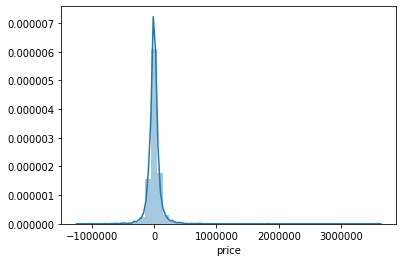

In [86]:
sns.distplot(y_test-y_pred)

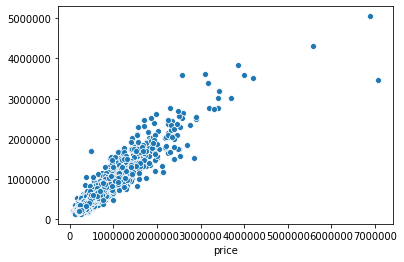

In [87]:
sns.scatterplot(y_test,y_pred)

In [88]:
cat_model.best_score_

{'learn': {'RMSE': 69608.9948923592}}

In [89]:
y_pred_train = cat_model.predict(X_train)

In [90]:
from sklearn import metrics

In [91]:
metrics.r2_score(y_pred,y_test)

0.8835447392201679

In [92]:
metrics.r2_score(y_pred_train,y_train)

0.9612898933139641

In [93]:
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE : 63078.49047174459
MSE: 13680985998.95911
RMSE: 116965.74711837269


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
y_rf_pred = rf.predict(X_test)

In [50]:
metrics.r2_score(y_rf_pred,y_test)

0.856053654052846

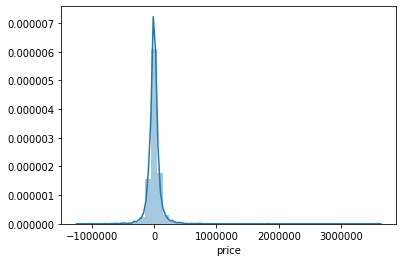

In [51]:
sns.distplot(y_test-y_pred)

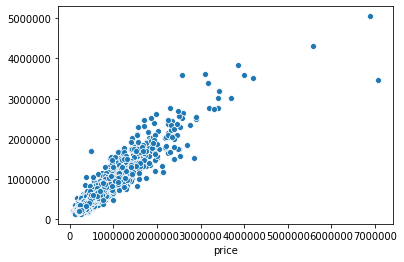

In [52]:
sns.scatterplot(y_test,y_pred)

In [53]:
print('MAE :', metrics.mean_absolute_error(y_test,y_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_rf_pred)))

MAE : 67210.49614893927
MSE: 15527389109.167933
RMSE: 124608.94473980562


In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [ ]:
random_rf = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,verbose=2,cv=5,n_iter=100,n_jobs=1,scoring='neg_mean_squared_error')
random_rf.fit(X_train,y_train)

In [104]:
import pickle
file = open('cbr.pkl','wb')
pickle.dump(cat_model,file)

In [105]:
model = pickle.load(open('cbr.pkl','rb'))

In [106]:
model